In [0]:
Applying K-means algorithm on NASDAQCOM and Yield curve attributes of the dataset

Code snippet to mount the google drive on colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Mention the location of your dataset on google drive

In [0]:
cd '/content/drive/My Drive/DataSets'


/content/drive/My Drive/DataSets


Importing required libraries for k-means clustering

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Code to read the dataset csv file and print the first few records

In [0]:
data_records = pd.read_csv("/content/drive/My Drive/DataSets/nasdaq-unemploy-yieldindex1971-monthly.csv")
data_records.head()

,DATE,NASDAQCOM,UNEMPLOY,T10Y2Y_NBD19760601
0,1976-07-01,91.447619,7490,122.52924
1,1976-08-01,90.870909,7518,141.91719
2,1976-09-01,91.405714,7380,147.01132
3,1976-10-01,89.500000,7430,178.07147
4,1976-11-01,89.531500,7620,184.81655


Print entire dataset

In [0]:
data_records

,DATE,NASDAQCOM,UNEMPLOY,T10Y2Y_NBD19760601
0,1976-07-01,91.447619,7490,122.52924
1,1976-08-01,90.870909,7518,141.91719
2,1976-09-01,91.405714,7380,147.01132
3,1976-10-01,89.500000,7430,178.07147
4,1976-11-01,89.531500,7620,184.81655
5,1976-12-01,94.551818,7545,186.21668
6,1977-01-01,96.898095,7280,163.94674
7,1977-02-01,96.090000,7443,162.55187
8,1977-03-01,95.701304,7307,171.39264
9,1977-04-01,95.004500,7059,175.57572


Scale the data in the dataframe using MinMax Scaler in ScikitLearn, to bring all values in the same range. Since recession can be predicted using NASDAQ and Treasury value (Yield Curve), these two attributes are scaled.



In [0]:
#Scaling the NASDAQCOM attribute in the dataset
scaler = MinMaxScaler()
scaler.fit(data_records.NASDAQCOM.values.reshape(-1,1))
data_records.NASDAQCOM = scaler.transform(data_records.NASDAQCOM.values.reshape(-1,1))

#Scaling the T10Y2Y_NBD19760601 attribute in the dataset
scaler = MinMaxScaler()
scaler.fit(data_records.T10Y2Y_NBD19760601.values.reshape(-1,1))
data_records.T10Y2Y_NBD19760601 = scaler.transform(data_records.T10Y2Y_NBD19760601.values.reshape(-1,1))

data_records

,DATE,NASDAQCOM,UNEMPLOY,T10Y2Y_NBD19760601
0,1976-07-01,0.000240,7490,0.627297
1,1976-08-01,0.000169,7518,0.658559
2,1976-09-01,0.000235,7380,0.666773
3,1976-10-01,0.000000,7430,0.716855
4,1976-11-01,0.000004,7620,0.727731
5,1976-12-01,0.000622,7545,0.729988
6,1977-01-01,0.000912,7280,0.694080
7,1977-02-01,0.000812,7443,0.691831
8,1977-03-01,0.000764,7307,0.706086
9,1977-04-01,0.000678,7059,0.712831


As you can see from the above table, the values for NASDAQCOM and T10Y2Y_NBD19760601 (Yield) are scaled now

Specify the columns used for K-means clustering


x axis -> NASDAQCOM


y axis -> T10Y2Y_NBD19760601

In [0]:
vectors_set1 = data_records[['NASDAQCOM','T10Y2Y_NBD19760601']]
print(vectors_set1)

     NASDAQCOM  T10Y2Y_NBD19760601
0     0.000240            0.627297
1     0.000169            0.658559
2     0.000235            0.666773
3     0.000000            0.716855
4     0.000004            0.727731
5     0.000622            0.729988
6     0.000912            0.694080
7     0.000812            0.691831
8     0.000764            0.706086
9     0.000678            0.712831
10    0.000917            0.671563
11    0.001031            0.660754
12    0.001460            0.642057
13    0.001365            0.587722
14    0.001345            0.556394
15    0.001201            0.513733
16    0.001379            0.517201
17    0.001751            0.532057
18    0.001390            0.524392
19    0.001595            0.523961
20    0.001788            0.522467
21    0.002621            0.512325
22    0.003644            0.498043
23    0.004006            0.474543
24    0.004019            0.460010
25    0.005303            0.438651
26    0.005635            0.399747
27    0.004704      

Plot the graph for k-means

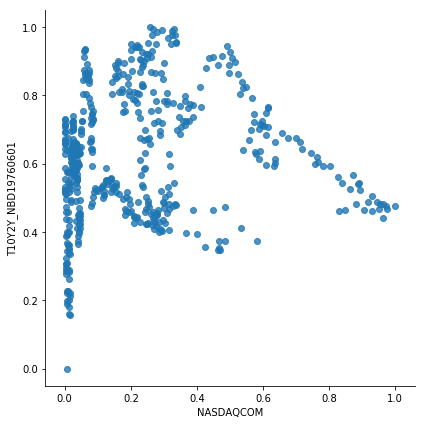

In [0]:
vectors_set = []

for i in range(len(vectors_set1)):
  vectors_set.append([vectors_set1['NASDAQCOM'][i], vectors_set1['T10Y2Y_NBD19760601'][i]])

df = pd.DataFrame({"x": [v[0] for v in vectors_set], "y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, height=6)
plt.xlabel('NASDAQCOM')               #label for x axis
plt.ylabel('T10Y2Y_NBD19760601')      #label for y axis
plt.show()


Estimate the k - optimal number of clusters using Elbow technique

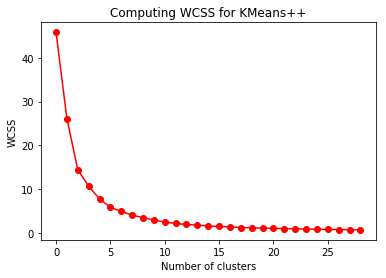

In [0]:
from sklearn.cluster import KMeans

# Use the Elbow method to find a good number of clusters using WCSS

#WCSS means (within-cluster sums of squares)
#Also, minimizing the WCSS (within-cluster sums of squares) will necessarily maximize the distance between clusters.

vals = vectors_set1.select_dtypes(include=[np.number]).fillna(0).values
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(vals)
    wcss.append(kmeans.inertia_)
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

According to Elbow method, the above graph shows that the optimal value for k (number of clusters) is 4


Code to implement k-means algorithm



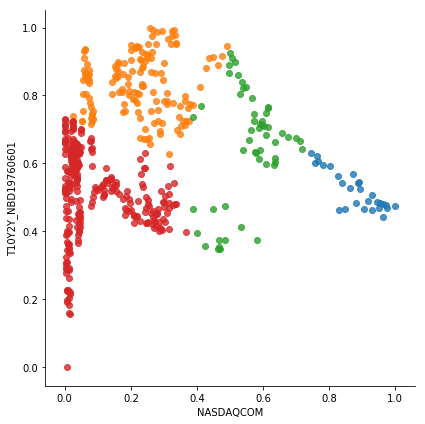

In [0]:
# k-means algorithm
vectors = tf.constant(vectors_set)
num_clusters = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [num_clusters, -1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat(axis=0, values=[
    tf.reduce_mean(
        tf.gather(vectors,
                  tf.reshape(
                      tf.where(
                          tf.equal(assignments, c)
                      ), [1, -1])
                  ), axis=[1])
    for c in range(num_clusters)])

update_centroides = tf.assign(centroides, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, height=6, hue="cluster", legend=False)
plt.xlabel('NASDAQCOM')              #label for x axis
plt.ylabel('T10Y2Y_NBD19760601')     #label for y axis
plt.show()

Data Narrative:

The above graph shows relationship between yield curve inversions and the NASDAQ index. As the bond mature further into the future, the interest rate typically increases. With inversion, that relationship goes into reverse. When the yield curve is inverted, you earn less interest on a long-term bond, than on the short-term one. This factor is a strong indicator in predicting the recession. With yield curve inversion - downward slope, NASDAQ index is also declined which eventually affects the economy. 

Applying GMM algorithm on NASDAQCOM and Yield curve attributes of the dataset

Importing required libraries for GMM clustering

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

Scale the data in the dataframe using MinMax Scaler in ScikitLearn, to bring all values in the same range. Since recession can be predicted using NASDAQ and Treasury value (Yield Curve), these two attributes are scaled.

In [0]:
scaler = MinMaxScaler()

#Scaling the NASDAQCOM attribute in the dataset
scaler.fit(data_records.NASDAQCOM.values.reshape(-1,1))
data_records.NASDAQCOM = scaler.transform(data_records.NASDAQCOM.values.reshape(-1,1))

#Scaling the T10Y2Y_NBD19760601 attribute in the dataset
scaler.fit(data_records.T10Y2Y_NBD19760601.values.reshape(-1,1))
data_records.T10Y2Y_NBD19760601 = scaler.transform(data_records.T10Y2Y_NBD19760601.values.reshape(-1,1))

data_records

,DATE,NASDAQCOM,UNEMPLOY,T10Y2Y_NBD19760601
0,1976-07-01,0.000240,7490,0.627297
1,1976-08-01,0.000169,7518,0.658559
2,1976-09-01,0.000235,7380,0.666773
3,1976-10-01,0.000000,7430,0.716855
4,1976-11-01,0.000004,7620,0.727731
5,1976-12-01,0.000622,7545,0.729988
6,1977-01-01,0.000912,7280,0.694080
7,1977-02-01,0.000812,7443,0.691831
8,1977-03-01,0.000764,7307,0.706086
9,1977-04-01,0.000678,7059,0.712831


Specify the columns used for GMM clustering

In [0]:
X = data_records[['NASDAQCOM','T10Y2Y_NBD19760601']]
print(X)

     NASDAQCOM  T10Y2Y_NBD19760601
0     0.000240            0.627297
1     0.000169            0.658559
2     0.000235            0.666773
3     0.000000            0.716855
4     0.000004            0.727731
5     0.000622            0.729988
6     0.000912            0.694080
7     0.000812            0.691831
8     0.000764            0.706086
9     0.000678            0.712831
10    0.000917            0.671563
11    0.001031            0.660754
12    0.001460            0.642057
13    0.001365            0.587722
14    0.001345            0.556394
15    0.001201            0.513733
16    0.001379            0.517201
17    0.001751            0.532057
18    0.001390            0.524392
19    0.001595            0.523961
20    0.001788            0.522467
21    0.002621            0.512325
22    0.003644            0.498043
23    0.004006            0.474543
24    0.004019            0.460010
25    0.005303            0.438651
26    0.005635            0.399747
27    0.004704      

Plot the Graph for GMM Clustering

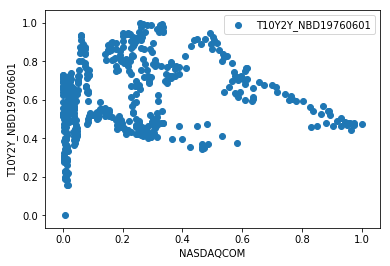

In [0]:
plt.scatter(X['NASDAQCOM'], X['T10Y2Y_NBD19760601'])
plt.xlabel('NASDAQCOM')              #label for x axis
plt.ylabel('T10Y2Y_NBD19760601')     #label for y axis
plt.legend()

Comparision with K-means:

From the above graph for GMM clustering, we can say that it is similar to the graph for K-means clustering performed on 'NASDAQCOM' and 'T10Y2Y_NBD19760601' (yield curve) attributes in the dataset.



Data Narrative:

The above graph shows relationship between yield curve inversions and the NASDAQ index. As the bond mature further into the future, the interest rate typically increases. With inversion, that relationship goes into reverse. When the yield curve is inverted, you earn less interest on a long-term bond, than on the short-term one. This factor is a strong indicator in predicting the recession. With yield curve inversion - downward slope, NASDAQ index is also declined which eventually affects the economy. 


Q. Any effect on development of the story about dataset?

Ans: No. Since the graphs for both K-means and GMM clustering on the 'NASDAQCOM' and 'T10Y2Y_NBD19760601' (yield curve) attributes of the dataset are similar, there is no change in the development of the story on what the data set depicts.

Below are the story points:

1. Inverted Yield curve – The yield on long term investment (10 year) is lower than the yield on short term investment (2 year)
2. Real GDP - Growth rate less than 2% indicates Bubble formation and less than 0% or negative values indicate Recession period.
3. NASDAQ index is declined when the yield curve is inverted
4. The GDP values goes down when the NASDAQ index is decreased
5. Unemployment level - As the value of NASDAQ composite index decreases, the rate of unemployment increases.

Q. Any new insights?

Ans: The visualization for K-means and GMM clustering depicts the same, so there are no new insights from the dataset.



Now create a function that will help us visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output:

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    probs = gmm.predict_proba(X)
    print("Matrix of size [n_samples, n_clusters]: \n\n", probs[:5].round(3))
    size = 50 * probs.max(1) ** 2  # square emphasizes differences
    if label:
        #print("In If block")
        ax.scatter(X['NASDAQCOM'], X['T10Y2Y_NBD19760601'], c=labels, s=size, cmap='viridis', zorder=2)
    else:
        #print("In else block")
        ax.scatter(X['NASDAQCOM'], X['T10Y2Y_NBD19760601'], s=size, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

With this in place, we can take a look at what the four-component GMM gives us for our initial data

Matrix of size [n_samples, n_clusters]: 

 [[0.904 0.    0.084 0.012]
 [0.942 0.    0.03  0.028]
 [0.945 0.    0.021 0.034]
 [0.9   0.    0.001 0.099]
 [0.878 0.    0.    0.121]]


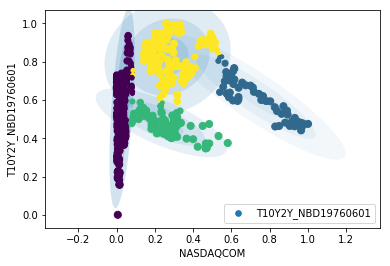

In [0]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)
plt.xlabel('NASDAQCOM')               #label for x axis
plt.ylabel('T10Y2Y_NBD19760601')      #label for y axis
plt.legend()

A Gaussain distribution is completely determined by its covariance matrix and its mean (location in the space). The covariance matrix of a Gaussian distribution determines the directions and lengths of the axes of its density contours, all of which are ellipsoids.

Four types of covariances are:

1. Full 
2. Tied
3. Diagonal
4. Spherical


Similarly, we can use the GMM approach to fit our stretched dataset; allowing for a full covariance. The model will fit even very oblong, stretched-out clusters


Matrix of size [n_samples, n_clusters]: 

 [[0.904 0.    0.084 0.012]
 [0.942 0.    0.03  0.028]
 [0.945 0.    0.021 0.034]
 [0.9   0.    0.001 0.099]
 [0.878 0.    0.    0.121]]


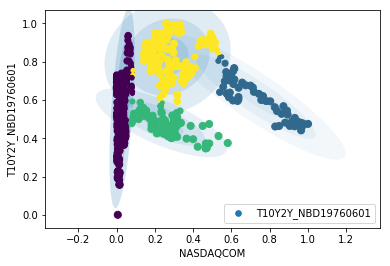

In [0]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X)                   #Calling the plot_gmm function to plot the data
plt.xlabel('NASDAQCOM')            #label for x axis
plt.ylabel('T10Y2Y_NBD19760601')   #label for y axis
plt.legend()

Above graph is for covariance type = "full"

Covariance type as diagonal

Matrix of size [n_samples, n_clusters]: 

 [[0.983 0.    0.001 0.016]
 [0.966 0.    0.    0.033]
 [0.96  0.    0.    0.04 ]
 [0.89  0.    0.    0.11 ]
 [0.868 0.    0.    0.132]]


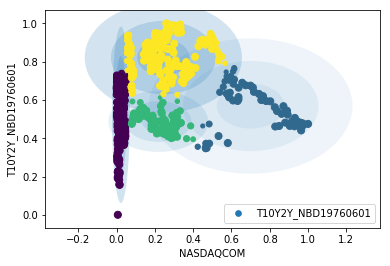

In [0]:
gmm = GaussianMixture(n_components=4, covariance_type='diag', random_state=42)
plot_gmm(gmm, X)                       #Calling the plot_gmm function to plot the data
plt.xlabel('NASDAQCOM')                #label for x axis
plt.ylabel('T10Y2Y_NBD19760601')       #label for y axis
plt.legend()

Above graph is for covariance type = "diagonal"

Print the converged log-likelihood value and number of iterations needed for the model to converge

In [0]:
# print the converged log-likelihood value 
print(gmm.lower_bound_) 
  
# print the number of iterations needed 
# for the log-likelihood value to converge 
print(gmm.n_iter_)

0.5983573617424244
5


Conclusion:


Since the Clustering with GMM assignment is applying GMM algorithm on the dataset and comparing with K-means, I have applied the K-means algorithm first on selected attributes of the dataset followed by GMM algorithm. Both the algorithms are applied on 'NASDAQCOM' and 'T10Y2Y_NBD19760601' (yield curve) attributes of the dataset. 


Comparision with K-means:


The result (plotted graph) for both K-means and GMM algorithms are same and both the graphs depicts the similar story for yield curve inversion and NASDAQ index which are the strong factors in predicting the upcoming recession.

